###  Excersice 1


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
print(plt.style.available)

['seaborn-whitegrid', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-bright', 'seaborn', 'seaborn-poster', 'seaborn-notebook', 'seaborn-white', 'tableau-colorblind10', '_classic_test', 'seaborn-muted', 'seaborn-ticks', 'dark_background', 'grayscale', 'seaborn-talk', 'bmh', 'Solarize_Light2', 'seaborn-paper', 'fivethirtyeight', 'ggplot', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn-darkgrid', 'fast', 'seaborn-deep', 'classic']


In [6]:
plt.style.use('seaborn')

In [8]:
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [9]:
data=pd.read_csv('GOOG.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 7 columns):
Date         3627 non-null object
Open         3627 non-null float64
High         3627 non-null float64
Low          3627 non-null float64
Close        3627 non-null float64
Adj Close    3627 non-null float64
Volume       3627 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 198.4+ KB


In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [12]:
Date=data['Date'].values

In [13]:
data.drop(['Date'],axis=1,inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


### Replacing the index by the date

In [14]:
data.index=Date


In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


### Investigating the data by ploting the columns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7dc70ab00>,
      dtype=object)

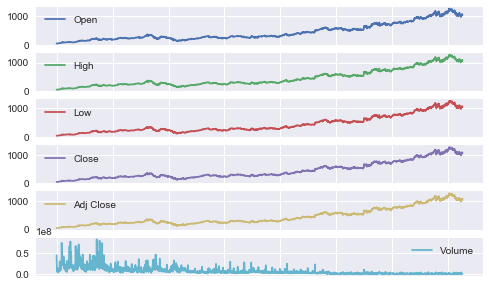

In [16]:
data.plot(subplots=True)


## The return 
$$SRet_i=\frac{\Delta S_{i-1}}{S_{i-1}}=\frac{ S_{i}-S_{i-1}}{S_{i-1}}$$

2004-08-19         NaN
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010775
Name: Adj Close, dtype: float64

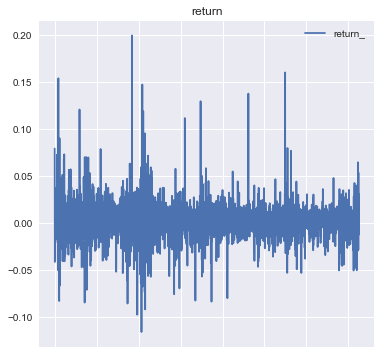

In [17]:
import numpy as np
return_=(data['Adj Close']-data['Adj Close'].shift(1)) / data['Adj Close'].shift(1)
(return_).plot(figsize=(6, 6),label='return_')   
plt.title('return')
plt.legend()
return_.head()

### Ploting the stock price

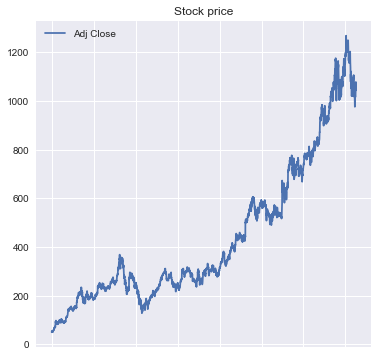

In [18]:
(data['Adj Close']).plot(figsize=(6, 6),label='Adj Close')
plt.title('Stock price')
plt.legend()

###  Log Returns $$LnRet_i=\ln(\frac{S_i}{S_{i-1}})$$

2004-08-19         NaN
2004-08-20    0.076433
2004-08-23    0.010013
2004-08-24   -0.042289
2004-08-25    0.010718
Name: Adj Close, dtype: float64

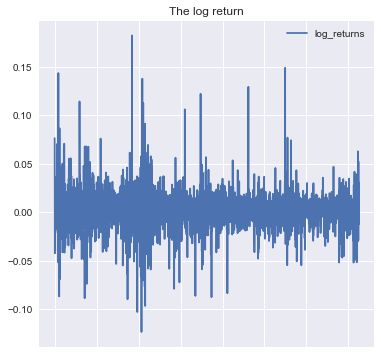

In [19]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
## plotting the log return 
(log_returns).plot(figsize=(6, 6),label='log_returns')   
plt.title('The log return')
plt.legend()
log_returns.head()

## removing the null values from log\_retruns and retrun_

In [20]:
log_returns.dropna(inplace=True)
return_.dropna(inplace=True)

### Plotting the histogram and normal distribution of log return

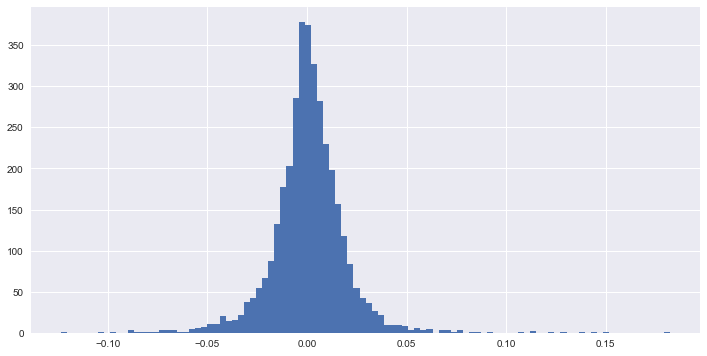

In [21]:
log_returns.hist(bins=100, figsize=(12, 6))

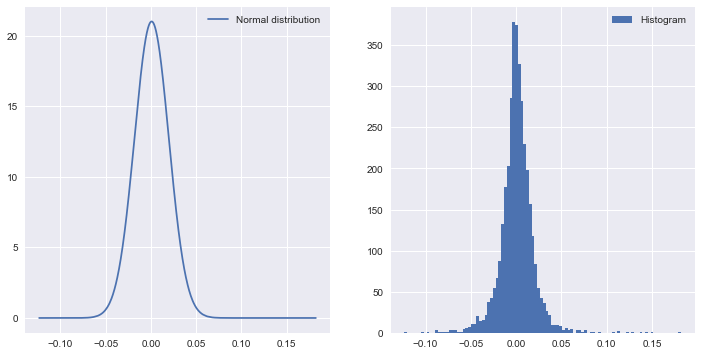

In [22]:
from scipy.stats import norm
plt.subplot(121)
plt.plot(sorted(log_returns),norm.pdf(sorted(log_returns), log_returns.mean(), log_returns.std()),label='Normal distribution')
plt.legend()
plt.subplot(122)
log_returns.hist(bins=100, figsize=(12, 6),label='Histogram')
plt.legend()

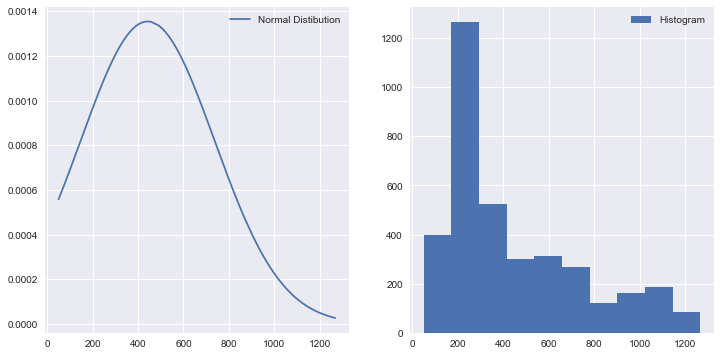

In [23]:
from scipy.stats import norm
plt.subplot(121)
plt.plot(sorted(data['Adj Close']),norm.pdf(sorted(data['Adj Close']), data['Adj Close'].mean(), data['Adj Close'].std()),label='Normal Distibution')
plt.legend()
plt.subplot(122)
data['Adj Close'].hist(bins=10, figsize=(12, 6),label="Histogram")
plt.legend()

### Statistics

In [24]:
import scipy.stats as scs
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('variance', sta[3]))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


In [25]:
print_statistics(return_)

     statistic           value
------------------------------
          mean         0.00103
      variance         0.00037
          skew         0.91644
      kurtosis        11.36471


### Normality testing

In [26]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    arr: ndarray      (object to generate statistics on)
    '''
    #print ("Skew of data set %14.3f" % scs.skew(arr))
    print ("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    #print ("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(arr)[1])


## Interpretation
###### Since the p-value is less than 0.05, we reject the null hypothesis that the data is normally distributed and conclude that the data does not follow the normal distibution.

In [27]:
normality_tests(return_)

Skew test p-value          0.000
Kurt test p-value          0.000
Norm test p-value          0.000


##### Using qqplot to test the normality of the series of returns.

Text(0.5,1,'Q-Q plot for normality')

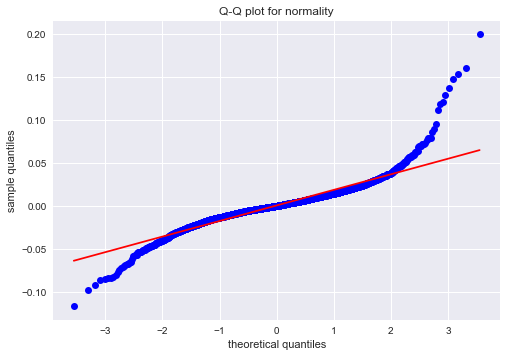

In [28]:
scs.probplot(return_, plot=plt,fit=True)
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('Q-Q plot for normality')

### annual volatility  per year
$$\sigma_T = \sqrt(T) \sigma_t$$
- T is full time period (e.g. 1 year)
- t time period (1 month, day)
- $\sigma_t$ standard deviation over single time period

#### because of have daily return of asset

* On average there is  about 253 trading days a year. This is from 365.25(days on average per year) * 5/7(proportion work days per week) = 260.89 - 6(weekday holidays) - 3*5/7(fixed date holidays) = 252.75 ~ 253.

In [29]:
T = 253*5  # multiply by 5 because we needed for 5 years 
volList = data['Adj Close'].rolling(T).std()*np.sqrt(T)

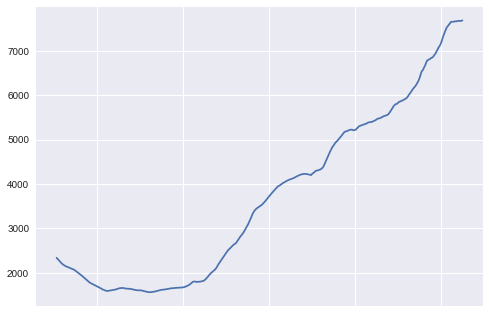

In [30]:
volList.plot()

### Plotting the autocorrelation functions

Text(0.5,1,'Autocorrelations of Log-returns of Google')

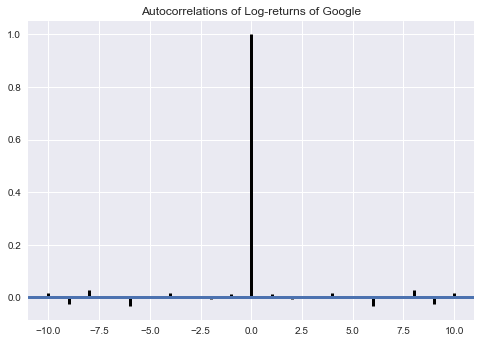

In [31]:
plt.acorr(return_, maxlags=10,lw=3)
plt.title('Autocorrelations of Log-returns of Google')

### Comments

### Question 2

### (a)
Calculate d(tW(t))

 Using the chain rule

\begin{align}
d(fg)=f dg+g df+dfdg
\end{align}

 applying this formula 
\begin{align}d(tW(t))=t dW(t)+W(t) dt+dwdt \end{align}
 but $dtdW\approx0$ , because 
 $dt<<1$ 
 and 
 
$dw=\epsilon \sqrt(dt))<<1$

so $dtdw\approx 0$
\begin{align}d(tW(t))=t dW(t)+W(t) dt \end{align}


### (b)
Integrate the expression show that $$\int_0^T W(t)dt=TW(T)-\int_0^TtdW(t) =\int_0^T(T-t)dW(t) $$

### Solution

Integrating both side  from $0$ to $T$
\begin{align} 
\int_0^T{d(tW(t))}=&\int_0^T t dW(t)+\int_0^T W(t) dt \\
tW(t)|_0^T=&\int_0^T t dW(t)+\int_0^T W(t) dt\\
TW(T)-0W(0)=&\int_0^T t dW(t)+\int_0^T W(t) dt\\
TW(T)=&\int_0^T t dW(t)+\int_0^T W(t) dt\\
\int_0^T W(t)dt=&TW(T)-\int_0^T t dW(t)\\
\end{align}
Which is also same also if we use $\int_0^T(T-t)dW(t) $.

In this case 

\begin{align}
\int_0^T{(T-t)dW(t)}=&\int_0^T{TdW(t)}-\int_0^T{tdW(t)}\\
=& T\int_0^T{dW(t)}-\int_0^T{tdW(t)}\\
=& T[W(t)|_0^T]-\int_0^T{tdW(t)}\\
\end{align}

### Question 3

### (a) Show, by applying Ito's formula to $S(t)$, where
$$S(t)=S_0e^{-\frac12\sigma^2t+\sigma W(t)}$$
that $S$ satisfies the SDE
$$dS(t)=\sigma SdW(t),\ S(0)=S_0$$

Let $S(t)=S_0 e^{x}$ where $x=-\frac12\sigma^2t+\sigma W(t).$

Taking the derivative of both size sides
$$dS(t)=S_0 d e^{x}$$ 
using Ito's formula
$$dS(t)=S_0 e^{x}(dx+(dx)^2)$$
since 

\begin{align}
x=&-\frac{1}{2}\sigma^2t+\sigma W(t)\\
dx=&-\frac{1}{2}\sigma^2dt+\sigma dW(t)\\
(dx)^2=&\frac{1}{4}\sigma^4(dt)^2-\sigma^3 dtdW(t)+\sigma^2 (dW(t))^2
\end{align}

but 
\begin{align}
(dt)^2=dtdW(t)=0 \\
(dW(t))^2=&dt
\end{align}
then

$$(dx)^2=\sigma^2 dt$$

Now combining every thing together we get
$$dS(t)=S_0 e^{x}(-\frac12\sigma^2dt+\sigma dW(t)+\sigma^2 dt)=S_0 e^{-\frac12\sigma^2t+\sigma W(t)}(\sigma dW(t)=\sigma SdW(t)$$ 
because $S(t)=S_0e^{-\frac12\sigma^2t+\sigma W(t)}$.

Checking the initial condition

$$S(0)=S_0e^{-\frac12\sigma^2\times 0+\sigma W(0)}$$
$$S_0e^{\sigma W(0)}$$

but $$W(0)=\epsilon \sqrt(0)=0$$

then $$S(0)=S_0e^0=S_0.$$

### (b)

We want to write a function to simulate $S(t)=S_0e^{-\frac12\sigma^2t+\sigma W(t)}$

- $S_0$ : is initial amount
- $\sigma $ : is a paramter will be chosen
- W(t) : is random walk will be calculated by the formula
$$W(t)=\epsilon \sqrt(dt)$$


- 
\begin{align}
S_{i+1}&=S_i\exp((-\frac12\sigma^2)\,\Delta t+\sigma\epsilon\sqrt{\Delta t})
\end{align}

In [32]:
import numpy as np

def Q3b(S0,sig,dt,label):

    t=np.arange(0,1,dt)
    S=np.zeros(len(t))
    S[0]=S0      
    # epsilon : np.random.randn()
    for i in range (0,len(t)-1):
        S[i+1] = S[i] *np.exp(-0.5*sig**2*dt+sig*np.sqrt(dt)*np.random.randn())
        #S0=S
        #A.append(S)
    plt.plot(t,S,label=label)

### Note: all the simulation example has the same starting amount

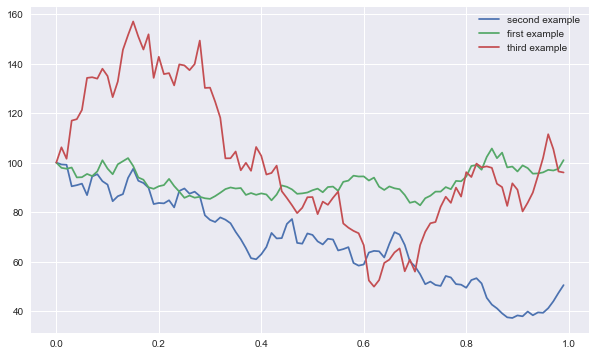

In [33]:
simulate={'first example':[100,0.25,.01],'second example':[100,.5,.01],'third example':[100,.75,.01]}
fig,ax=plt.subplots(figsize=(10,6),ncols=1,nrows=1)
#np.random.seed(1000)
for i in simulate:
    Q3b(simulate[i][0],simulate[i][1],simulate[i][2],i)
    ax.legend()    

### Question 4

#### Note: Due to change in the order in this question, I became a littel bit confused. So I used to plot the path of the SDE and the path for the solution.

### (a)

Our equation is 
$$dS(t)=(a+bt)+\sigma dW(t)$$

integrating the the both side from $0$ to $t$ with respect to the dummy variable $u$ 

\begin{align}
\int_0^t{dS(u)}=&\int_0^t{(a+bu)du}+\int_0^t{\sigma dW(u)}\\
           S(u)|0^t     =&(au+b\frac{u^2}{2})|0^t+\sigma W(u)|0^t\\
           S(t)-S(0)=&(at+b\frac{t^2}{2})-(a\times 0+b\frac{0^2}{2})+\sigma W(t)-\sigma W(0)
\end{align}
but $W(0)=0$, then
$$S(t)=S_0+(at+b\frac{t^2}{2})+\sigma W(t)$$
where $S(0)=S_0$

### (b)

I will use discretize formula for $dW=\epsilon \sqrt(dt)$ as follows
$$W(t+\Delta t)=W(t)+\epsilon \sqrt(\Delta t)$$
$$W_{i+1}=W_i+\epsilon \sqrt(\Delta t)$$


In [34]:


def Qba(S0,a,b,sig,label):
    dt=1e-2
    t=np.arange(0,20,dt)
               
    W = np.random.randn(len(t))*np.sqrt(dt)
    S = S0+(a*t+b*t**2)+sig*W

    plt.plot(t,S,label=label)


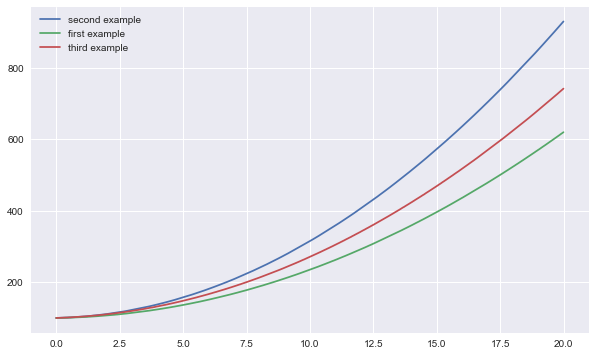

In [35]:
simulate={'first example':[100,1,1.25,.5],'second example':[100,1.5,2,.25],'third example':[100,2.1,1.5,.75]}
fig,ax=plt.subplots(figsize=(10,6),ncols=1,nrows=1)

for i in simulate:
    Qba(simulate[i][0],simulate[i][1],simulate[i][2],simulate[i][3],i)
    ax.legend()


In [36]:


def Qba1(a,b,sig,dt,label):

    t=np.arange(0,20,dt)
                
    W = np.zeros((len(t)))
    for i in range (len(t)-1):
        W[i+1] = W[i]+np.sqrt(dt)*np.random.randn();

    dS = (a+b*t)*dt+sig*W

    plt.plot(t,dS,label=label)


### Simulation with different parameters for a,b and sigma

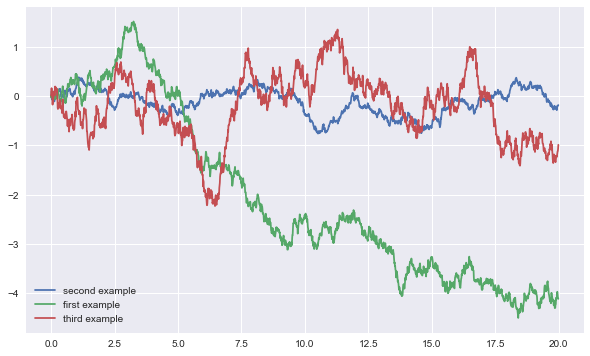

In [37]:
simulate={'first example':[1,1.25,.5,.01],'second example':[1.5,2,.25,.01],'third example':[1.1,1.5,.75,.01]}
fig,ax=plt.subplots(figsize=(10,6),ncols=1,nrows=1)
for i in simulate:
    Qba1(simulate[i][0],simulate[i][1],simulate[i][2],simulate[i][3],i)
    ax.legend()

### Question 5

In [38]:
from math import exp, sqrt
## formula to generate the proice
def the_price(S,sigma,r,T):
    return S * exp((r - 0.5 * sigma**2) * T + sigma * sqrt(T) * np.random.randn()) 
## Calculating the payoff
def put_payoff(S_T,K):
    return max(0, K - S_T )
np.random.seed(10)
S = 100 
sigma = 0.25 
r = 0.03 
T = 2
K = 90
N = 100000
payoffs = []

df = exp(-r * T) #discout factor


for i in range(N):
    S_T = the_price(S,sigma,r,T)
    payoffs.append(put_payoff(S_T, K))

price = df * np.mean(payoffs)
print ('Price: %.5f' % price)


Price: 6.73891


### Question 6

The Ornstein-Uhlenbeck equation is
\begin{align}
r(t)=&r(0)e^{-at}+b(1-e^{-at})+\sigma e^{-at} \int_0^t{e^{a\tau}dW(\tau)}\\
r(0)=0.
\end{align}
The discretize formula is the same as the above formula, just we need to use the discretize formula for $dW$

$$W_{i+1}=W_i+\epsilon \sqrt(\Delta t)$$

Also we can do this step with the intgral in one step

In [39]:

import numpy as np
def ornsten(a,b,sig,label):
    dt=1e-2
    t=np.arange(0,2,dt)
    r0 = 0 # intial condition
                   
    W = np.zeros((len(t)))
    for i in range (len(t)-1):
        W[i+1] = W[i]+np.sqrt(dt)*np.exp(a*t[i])*np.random.randn()

    r = r0*np.exp(-a*t)+b*(1-np.exp(-a*t))+sig*np.exp(-a*t)*W

    plt.plot(t,r,label=label)


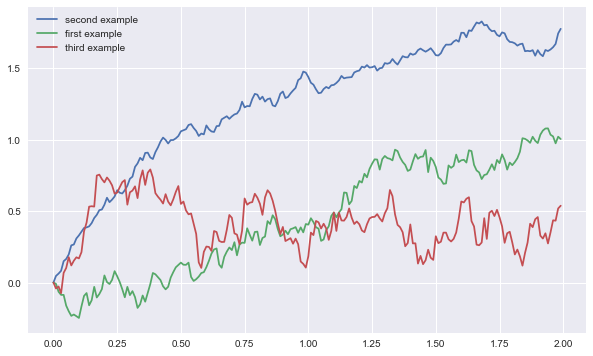

In [40]:
simulate={'first example':[1,1.25,.5],'second example':[1.5,2,.25],'third example':[1.1,1.5,.75]}
fig,ax=plt.subplots(figsize=(10,6),ncols=1,nrows=1)
for i in simulate:
    ornsten(simulate[i][0],simulate[i][1],simulate[i][2],i)
    ax.legend()